# Pandas

https://pandas.pydata.org/

In [1]:
import pandas as pd
import numpy as np
pd.__version__

'1.1.5'

Pandas es la navaja suiza de los analista y científicos de datos. Sirve para manipular datos, analizar datos.

## Estructura de los datos en Pandas

Tres estructuras principales: *series*, *dataframe*, *panel*.

**Series**: es un vector unidimensional, con etiquetas (labels), y normalmente con datos homogéneos.

In [2]:
print(pd.Series([1, 2, 3, 6, 8]))

0    1
1    2
2    3
3    6
4    8
dtype: int64


In [4]:
print(np.array([1,2,3,6,8]))

[1 2 3 6 8]


In [5]:
print(pd.Series([1.5, .6, 5, 7.8]))


0    1.5
1    0.6
2    5.0
3    7.8
dtype: float64


In [6]:
print(pd.Series([1, 5., False, "Data"]))

0        1
1        5
2    False
3     Data
dtype: object


In [7]:
a = pd.Series([1, 5., False, "Data"])
type(a)

pandas.core.series.Series

In [12]:
a[3] # llamamos los valores por su posición o índice

'Data'

In [15]:
a.index

RangeIndex(start=0, stop=4, step=1)

In [16]:
# Creamos una serie con el índice etiquetado, partimos de un diccionario
b = pd.Series({
    "alice" : 2,
    "bob" : 3,
    "eve" :5
})
print(b)

alice    2
bob      3
eve      5
dtype: int64


In [22]:
dicc = {
    "alice" : 2,
    "bob" : 3,
    "eve" :5
}
type(dicc)

dict

In [23]:
pd.Series(dicc)

alice    2
bob      3
eve      5
dtype: int64

In [17]:
b.index

Index(['alice', 'bob', 'eve'], dtype='object')

In [18]:
print(b['alice']) # extraemos los valores por su etiqueta

2


In [19]:
print(b[0]) # extraemos los valores por su índice

2


In [24]:
# otra forma alternativa de crear una Series
print(pd.Series([2,5,7],
                index = ["gaby", "jorge", "mag"]))

gaby     2
jorge    5
mag      7
dtype: int64


## Dataframe

La segunda estructura de datos prinicipal es el **dataframe**

Un **dataframe** es una tabla bidimensional con **etiquetas** en los ejes y datos **heterogéneos**.

In [25]:
print(pd.DataFrame([
                    [1,2,3],
                    [4,5,6]
]))

   0  1  2
0  1  2  3
1  4  5  6


al igual que la *series* , el dataframe puede tener etiquetas en los ejes 
```
Filas: axis=0
Cols: axis=1
```

In [27]:
# utilizamos un diccionario para definir cada columna y una lista para indicar las etiquetas
d = {
    "alice" : [1953, 12, 3],
     "bob" : [1981, 7, 14],
     "eve" : [2011, 11, 11]
}
print(d)

{'alice': [1953, 12, 3], 'bob': [1981, 7, 14], 'eve': [2011, 11, 11]}


In [28]:
type(d)

dict

In [29]:
print(pd.DataFrame(d, index=['year', 'month', 'day']))

       alice   bob   eve
year    1953  1981  2011
month     12     7    11
day        3    14    11


In [42]:
# alternativa 
listas_vals = [[1953, 12, 3], [1955, 11, 24], [2011, 10, 10]]
df = pd.DataFrame(data=listas_vals,
                  columns=['year','month','day'],
                  index=['alice','bob','eve'],
                  dtype=np.int16)
print(df)

       year  month  day
alice  1953     12    3
bob    1955     11   24
eve    2011     10   10


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, alice to eve
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   year    3 non-null      int16
 1   month   3 non-null      int16
 2   day     3 non-null      int16
dtypes: int16(3)
memory usage: 42.0+ bytes


In [44]:
# Creamos una estructura de datos heterogénea
a = [
     [1953, "computer science", 3.5], 
     [1955, "archeology", 3.8], 
     [2011, "biology", 2.8]]
print(pd.DataFrame(a, 
                   columns=["year", "major", "average grade"], 
                   index = ["alice", "bob", "eve"]))

       year             major  average grade
alice  1953  computer science            3.5
bob    1955        archeology            3.8
eve    2011           biology            2.8


## Panel

Es la tercera estructura en Pandas del tipo tridimensional, puede contener etiquetas y ser heterogénea. Es la menos usada en pandas y normalmente para 
imágenes.

In [48]:
img = [[[0, 0, 0], 
        [0, 15, 0], 
        [0, 0, 15], 
        [15, 0, 0], 
        [180, 180, 180]
        ],
       [
        [200, 200, 200], 
        [125, 1, 125], 
        [100, 100, 2], 
        [1, 152, 125], 
        [15, 25, 20]
        ]
       ]


In [50]:
pd.Panel()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  """Entry point for launching an IPython kernel.


<pandas.__getattr__.<locals>.Panel at 0x7ff6b669be50>

In [49]:
data_panel = pd.Panel(img,
         minor_axis = ["R", "G", "B"], # píxel 3 valores
         major_axis = ["x"+str(i) for i in range(5)], # 5 px horizontal
         items = ["y"+str(i) for i in range(2)]
         ) # 2 px vertical

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  """Entry point for launching an IPython kernel.


TypeError: ignored

Populating the interactive namespace from numpy and matplotlib


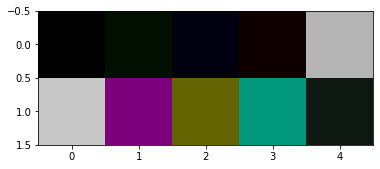

In [52]:
%pylab inline
from pylab import imshow
imshow(array(img, dtype=uint32), interpolation='nearest')

## Operaciones básicas sobre un dataframe

In [53]:
# Importamos un fichero y lo pasamos a dataframe
data = pd.read_csv("/content/marvel-wikia-data.csv")
data

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16371,657508,Ru'ach (Earth-616),\/Ru%27ach_(Earth-616),No Dual Identity,Bad Characters,Green Eyes,No Hair,Male Characters,NaN,Living Characters,NaN,NaN,NaN
16372,665474,Thane (Thanos' son) (Earth-616),\/Thane_(Thanos%27_son)_(Earth-616),No Dual Identity,Good Characters,Blue Eyes,Bald,Male Characters,NaN,Living Characters,NaN,NaN,NaN
16373,695217,Tinkerer (Skrull) (Earth-616),\/Tinkerer_(Skrull)_(Earth-616),Secret Identity,Bad Characters,Black Eyes,Bald,Male Characters,NaN,Living Characters,NaN,NaN,NaN
16374,708811,TK421 (Spiderling) (Earth-616),\/TK421_(Spiderling)_(Earth-616),Secret Identity,Neutral Characters,NaN,NaN,Male Characters,NaN,Living Characters,NaN,NaN,NaN


In [56]:
data.index # devuelve el número de índices

RangeIndex(start=0, stop=16376, step=1)

In [57]:
data.columns # devuelve los valores de las columnas

Index(['page_id', 'name', 'urlslug', 'ID', 'ALIGN', 'EYE', 'HAIR', 'SEX',
       'GSM', 'ALIVE', 'APPEARANCES', 'FIRST APPEARANCE', 'Year'],
      dtype='object')

In [58]:
data.describe() # por defecto por valores numéricos

,page_id,APPEARANCES,Year
count,16376.000000,15280.000000,15561.000000
mean,300232.082377,17.033377,1984.951803
std,253460.403399,96.372959,19.663571
min,1025.000000,1.000000,1939.000000
25%,28309.500000,1.000000,1974.000000
50%,282578.000000,3.000000,1990.000000
75%,509077.000000,8.000000,2000.000000
max,755278.000000,4043.000000,2013.000000


## Indexación y selección de datos

In [59]:
# Seleccionamos los nombres de los diez primeros personajes
data["name"][0:10]

0              Spider-Man (Peter Parker)
1        Captain America (Steven Rogers)
2    Wolverine (James \"Logan\" Howlett)
3      Iron Man (Anthony \"Tony\" Stark)
4                    Thor (Thor Odinson)
5             Benjamin Grimm (Earth-616)
6              Reed Richards (Earth-616)
7             Hulk (Robert Bruce Banner)
8              Scott Summers (Earth-616)
9             Jonathan Storm (Earth-616)
Name: name, dtype: object

In [64]:
# Seleccionamos el nombre, estado de identidad, color de pelo solo filas 3, 8
data.loc[[3,8],
      ["name", "ID", "HAIR"]]

,name,ID,HAIR
3,"Iron Man (Anthony \""Tony\"" Stark)",Public Identity,Black Hair
8,Scott Summers (Earth-616),Public Identity,Brown Hair


In [66]:
# Seleccionamos filas según el género utilizando operadores binarios
male = data[data.SEX == 'Male Characters']
female = data[data.SEX == 'Female Characters']
print(male)
print(female)

       page_id  ...    Year
0         1678  ...  1962.0
1         7139  ...  1941.0
2        64786  ...  1974.0
3         1868  ...  1963.0
4         2460  ...  1950.0
...        ...  ...     ...
16367   694583  ...     NaN
16371   657508  ...     NaN
16372   665474  ...     NaN
16373   695217  ...     NaN
16374   708811  ...     NaN

[11638 rows x 13 columns]
       page_id  ...    Year
11        1863  ...  1961.0
13        2614  ...  1975.0
17        1978  ...  1965.0
24        2512  ...  1964.0
26        1976  ...  1963.0
...        ...  ...     ...
16361   713903  ...     NaN
16362   508693  ...     NaN
16366   643435  ...     NaN
16368   703892  ...     NaN
16369   660799  ...     NaN

[3837 rows x 13 columns]


In [69]:
data[data.SEX == 'Male Characters']

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16367,694583,Marcus (Kate Bishop's neighbor) (Earth-616),\/Marcus_(Kate_Bishop%27s_neighbor)_(Earth-616),Public Identity,Good Characters,Hazel Eyes,Bald,Male Characters,Homosexual Characters,Living Characters,NaN,NaN,NaN
16371,657508,Ru'ach (Earth-616),\/Ru%27ach_(Earth-616),No Dual Identity,Bad Characters,Green Eyes,No Hair,Male Characters,NaN,Living Characters,NaN,NaN,NaN
16372,665474,Thane (Thanos' son) (Earth-616),\/Thane_(Thanos%27_son)_(Earth-616),No Dual Identity,Good Characters,Blue Eyes,Bald,Male Characters,NaN,Living Characters,NaN,NaN,NaN
16373,695217,Tinkerer (Skrull) (Earth-616),\/Tinkerer_(Skrull)_(Earth-616),Secret Identity,Bad Characters,Black Eyes,Bald,Male Characters,NaN,Living Characters,NaN,NaN,NaN


In [70]:
# Combinamos operadores binarios para seleccionar los superhéroes con ID secreta que han aparecido más de dos mil veces
secret_and_popular = data[(data.APPEARANCES > 2000) & (data.ID == "Secret Identity")]
print(len(secret_and_popular))

1


In [72]:
print(secret_and_popular['name'])

0    Spider-Man (Peter Parker)
Name: name, dtype: object


In [73]:
# Otro método es con where
secr_and_pop2 = data.where((data.APPEARANCES > 1000) & (data.ID == "Secret Identity"))
secr_and_pop2

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678.0,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16371,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16373,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16374,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
# Para extraer los valores con doble condición a través de la función where, devolverá la misma estructura original
secr_and_pop2['name'][0:5]

0    Spider-Man (Peter Parker)
1                          NaN
2                          NaN
3                          NaN
4                          NaN
Name: name, dtype: object

In [76]:
# Para obviar este problema, utilizamos la función dropna() para eliminar los duplicados
secr_and_pop2.dropna(how="all")['name']

0      Spider-Man (Peter Parker)
19      Robert Drake (Earth-616)
23    Piotr Rasputin (Earth-616)
29       Kurt Wagner (Earth-616)
30            Vision (Earth-616)
Name: name, dtype: object

In [82]:
# aplicamos a filas axis=0, condición todos los valores nulos, "all"
data2 = secr_and_pop2.dropna(axis=0,how="all", inplace=False)['name']
data2

0      Spider-Man (Peter Parker)
19      Robert Drake (Earth-616)
23    Piotr Rasputin (Earth-616)
29       Kurt Wagner (Earth-616)
30            Vision (Earth-616)
Name: name, dtype: object

In [86]:
data3 = secr_and_pop2.dropna(axis=0, how='any', thresh=4)['name']
data3

0      Spider-Man (Peter Parker)
19      Robert Drake (Earth-616)
23    Piotr Rasputin (Earth-616)
29       Kurt Wagner (Earth-616)
30            Vision (Earth-616)
Name: name, dtype: object

## Agregación de datos

Pandas permite crear grupos de datos a partir de los valores de una o más columnas.

In [87]:
# Agrupamos el dataframe en función de la alineación del superhéroe
grouped = data.groupby("ALIGN")
grouped # devuelve un objeto del tipo DataFrameGroupBy

In [88]:
# Para visualizar los datos agrupados
for name, group in grouped:
  print(name, len(group))

Bad Characters 6720
Good Characters 4636
Neutral Characters 2208


In [89]:
# Agrupamos por ALIGN e ID
grouped = data.groupby(["ALIGN", "ID"])
for name, group in grouped:
  print(name, len(group))

('Bad Characters', 'Known to Authorities Identity') 3
('Bad Characters', 'No Dual Identity') 474
('Bad Characters', 'Public Identity') 1452
('Bad Characters', 'Secret Identity') 3223
('Good Characters', 'Known to Authorities Identity') 10
('Good Characters', 'No Dual Identity') 647
('Good Characters', 'Public Identity') 1628
('Good Characters', 'Secret Identity') 1613
('Neutral Characters', 'Known to Authorities Identity') 2
('Neutral Characters', 'No Dual Identity') 390
('Neutral Characters', 'Public Identity') 706
('Neutral Characters', 'Secret Identity') 818


In [90]:
# A partir de los datos agrupados, aplicamos la función de agregación np.mean
grouped.aggregate(np.mean)

page_id  ...         Year
ALIGN              ID                                            ...             
Bad Characters     Known to Authorities Identity   20762.666667  ...  1991.666667
                   No Dual Identity               420196.056962  ...  1973.530806
                   Public Identity                364450.002066  ...  1973.381458
                   Secret Identity                272270.281415  ...  1984.200065
Good Characters    Known to Authorities Identity   67293.700000  ...  1994.100000
                   No Dual Identity               351762.737249  ...  1981.512195
                   Public Identity                328621.391892  ...  1982.214422
                   Secret Identity                209598.569746  ...  1990.303430
Neutral Characters Known to Authorities Identity   25164.000000  ...  1988.500000
                   No Dual Identity               448877.128205  ...  1983.160237
                   Public Identity                405297.841360  ...  1987.366322
                   Secret Identity                255694.179707  ...  1992.339818

[12 rows x 3 columns]

In [91]:
# recuperamos la info de un único grupo
grouped.get_group(("Neutral Characters", "Known to Authorities Identity"))

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
106,18186,Venom (Symbiote) (Earth-616),\/Venom_(Symbiote)_(Earth-616),Known to Authorities Identity,Neutral Characters,Variable Eyes,No Hair,Agender Characters,NaN,Living Characters,348.0,May-84,1984.0
2668,32142,Obax Majid (Earth-616),\/Obax_Majid_(Earth-616),Known to Authorities Identity,Neutral Characters,Brown Eyes,Black Hair,Female Characters,NaN,Living Characters,13.0,Sep-93,1993.0


In [92]:
# creamos una dataframe con los nombres de los superhéroes
new_dataset = data[['name']]


In [96]:
# guardamos el dataframe en un fichero csv
new_dataset.to_csv("marvel-wikia-data-reduced.csv", encoding="utf-8")